# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, SAVE_2504, FISA_2504, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250501.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [20]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR


In [21]:
WidgetUniverse

## K200

In [6]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-05-16 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

In [9]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-05-16 downloaded.
kospi200_prices_250516.csv saved
df_prices updated
Execution time of download: 49 secs


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [10]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-05-16 uploaded.
Price data loaded


In [11]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [12]:
#PM.review_universe('UV_WTR')

In [13]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-05-16 downloaded.
etfs_weather_250516.csv saved
df_prices updated
Execution time of download: 1 secs


In [13]:
#wtr.save()

## FCTR

In [6]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## FUND

In [4]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

24 securities from 2023-03-29 to 2025-05-16 uploaded.
Master data for 315 funds loaded.
Price data loaded


In [35]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_performance_by_asset().index.to_list()
#tickers = None

TDF_2406: done
HANA_2408: done
SAVE_2503: done
FISA_2504: done


In [36]:
# FISA
tickers = tickers + ['K55363DD7958']
len(tickers)

25

In [37]:
kw = dict(
    start_date = '2024-06-01', 
    #close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 315 funds loaded.
24 tickers set to download


100%|███████████████████████████████████████████████████████████████| 24/24 [01:18<00:00,  3.28s/it]

... done
24 securities from 2023-03-29 to 2025-05-16 downloaded.
funds_prices_250516.csv saved
df_prices updated
Execution time of download: 79 secs


In [20]:
#_ = fund.save()

funds_prices_250430.csv saved


In [16]:
#fund.portfolio_data['universe']

### Master

In [110]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55210BR6654,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55210BR6480,신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류A-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55210BR6522,신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류C-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55105BC8507,삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]_Ae,삼성증권,일반,삼성,주식혼합,TDF,글로벌
K55105BC8523,삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]_Ce,삼성증권,일반,삼성,주식혼합,TDF,글로벌


In [7]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [105]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [106]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [107]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

8

In [108]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [109]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.91it/s]


5.1 secs elapsed, 0.1 secs paused (2.0%)


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.77it/s]

0.8 secs elapsed, 0.0 secs paused (0.0%)
fundm_info_250514.csv saved


### Monthly

In [111]:
fund = PM.create_universe('UV_FNDM')

315 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded


In [112]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 323 funds loaded.
Update existing data with 8 tickers
8 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 8/8 [01:20<00:00, 10.07s/it]

... done
323 securities from 2005-01-31 to 2025-03-31 downloaded.
ERROR: failed to save as fundm_prices_250331.csv exists
Execution time of download: 81 secs


In [113]:
_ = fund.save()

fundm_prices_250331.csv saved


### Cost

*Check missing cost data*

In [114]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [115]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250501.csv loaded
323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded
ERROR: 8 tickers missing cost data


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [116]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded
Master data for 323 funds loaded.
Cost data transaction_cost_250501.csv loaded
Cost data saved to transaction_cost_250514.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [12]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded


In [13]:
import random
tickers = random.sample(list(fund.df_prices.columns), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']

In [14]:
fund.get_names(tickers)

0) K55234DF3150: IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re
1) K55214CD4825: 유진챔피언중단기채증권자투자신탁(채권)ClassC-Re
2) KR5236AS4818: 한국밸류10년투자증권투자신탁 1(주식)종류C-E

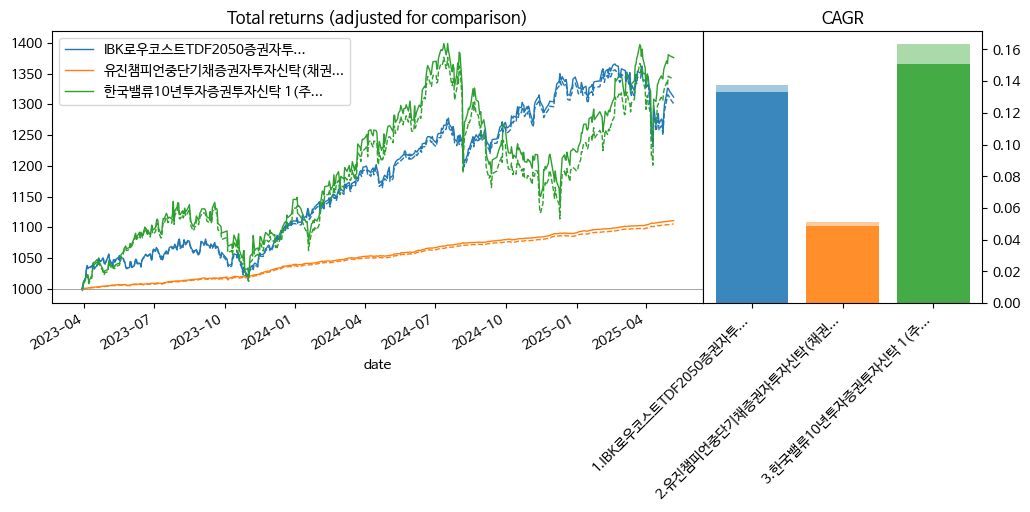

In [15]:
fund.plot(tickers, cost=cost, base=1000)

## LIQ

In [18]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [19]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-05-16 uploaded.
Price data loaded


In [20]:
#liq.get_names()

In [21]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.72it/s]

3.1 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-05-16 downloaded.
krx_liq_prices_250516.csv saved
df_prices updated
Execution time of download: 4 secs


## Additional Data

### Cost

*Check missing cost data*

In [35]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [36]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250424.csv loaded
300 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 300 funds loaded.
Price data loaded


### Financial Ratio

In [4]:
WidgetUniverse

In [5]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-05-09 loaded


In [8]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [14:25<00:00,  4.33s/it]


14.4 mins elapsed, 32.0 secs paused (3.7%)
Financial ratios of 200 stocks from 2023-01-02 to 2025-05-09 downloaded
kospi200_ratios_250509.csv saved


In [9]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [10]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-05-09
Price: 2022-01-03 ~ 2025-05-09


# Performance

In [4]:
PM.review()

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [5]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-05-16 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_momentum_250515.csv loaded

PER_2410:
200 securities from 2022-01-03 to 2025-05-16 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-05-16 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_per2_250509.csv loaded

WTR_2407:
6 securities from 2022-01-03 to 2025-05-16 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_wtr_static_250213.csv loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-05-16 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_wtr2412_static_241218.csv loaded



In [6]:
#pm.load('LIQ')

security_names updated
Data of tickers 009900, 016380 downloaded


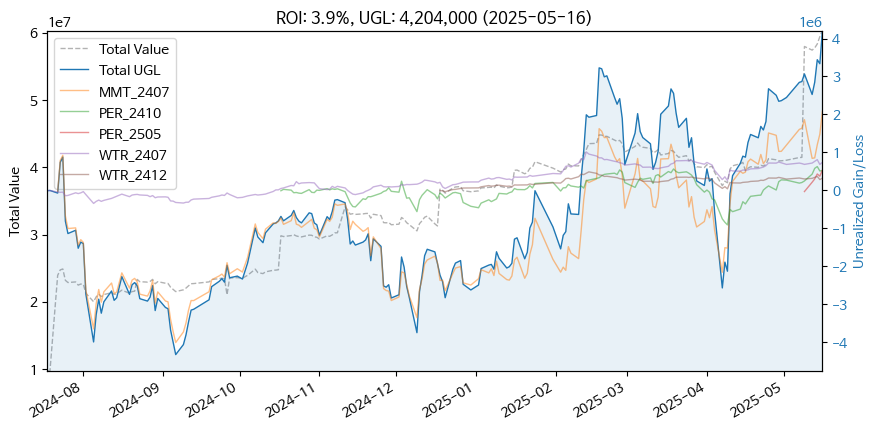

In [7]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=False)

In [8]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [9]:
pm.summary(date=w_date.value, exclude_cost=False)

portfolio,MMT_2407,PER_2410,PER_2505,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2025-05-09,2024-07-18,2024-12-18,2024-07-18
end,2025-05-16,2025-05-16,2025-05-16,2025-05-16,2025-05-16,2025-05-16
buy,"61,756,350","12,249,374","16,292,303","10,364,836","5,782,957","106,445,820"
sell,"46,784,778","2,617,050",0.0,"942,797",0.0,"50,344,625"
value,"17,055,396","10,153,696","16,826,617","10,163,090","6,106,106","60,304,905"
ugl,"2,083,823","521,372","534,314","741,052","323,149","4,203,710"
roi,0.0337,0.0426,0.0328,0.0715,0.0559,0.0395


Custom category loaded: portfolio2


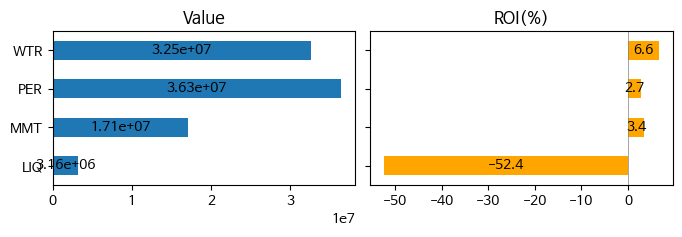

In [40]:
# custome category of portfolio type
df = pm.util_performance_by_asset()
sr = df['portfolio'].str.split('_').str.get(0).rename('portfolio2')
pm.import_category(sr)

pm.summary(category='portfolio2', plot=True, figsize=(8,2))

*print summary for google sheet 금융자산운용*

In [24]:
pm.util_print_summary(date=w_date.value)

2025-05-07, MMT, 2407, , , , 평가, , 60559696, 46784778, 15381437, 1606519, 0.0265
2025-05-07, PER, 2410, , , , 평가, , 12249374, 2617050, 9824378, 192054, 0.0157
2025-05-07, WTR, 2407, , , , 평가, , 10364836, 942797, 10142122, 720084, 0.0695
2025-05-07, WTR, 2412, , , , 평가, , 5782957, 0.0, 6109531, 326574, 0.0565


### All Funds

In [15]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=True)

TDF_2406:
23 securities from 2023-03-29 to 2025-05-16 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_tdf_static_250421.csv loaded

HANA_2408:
23 securities from 2023-03-29 to 2025-05-16 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_hana_static_240731.csv loaded

SAVE_2503:
23 securities from 2023-03-29 to 2025-05-16 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_save_static_250421.csv loaded

FISA_2504:
23 securities from 2023-03-29 to 2025-05-16 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_fisa_static_250429.csv loaded



In [16]:
start_date='2024-07-01'
#pm.plot(start_date=start_date, roi=False)

In [17]:
pm.summary()

portfolio,FISA_2504,HANA_2408,SAVE_2503,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2024-06-19,2024-06-19
end,2025-05-16,2025-05-16,2025-05-16,2025-05-16,2025-05-16
buy,"30,960,600","9,990,000","10,652,630","48,148,612","99,751,842"
sell,-251.0,0.0,"-3,481","-103,071","-106,803"
value,"31,222,561","10,244,267","10,687,180","47,897,839","100,051,847"
ugl,"261,710","254,267","31,069","-353,844","193,202"
roi,0.00845,0.0255,0.00292,-0.00735,0.00194


In [27]:
file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')

Custom category loaded: account, asset, manager, region, seller, strategy


In [18]:
file = 'funds_custom_category.csv'

# uncomment to save all tickers and their names 
#df = pm.util_performance_by_asset()
#df['name'].drop_duplicates().sort_values().to_csv(f'{path_data}/{file}')

pm.import_category(file, path_data)

Custom category loaded: name2


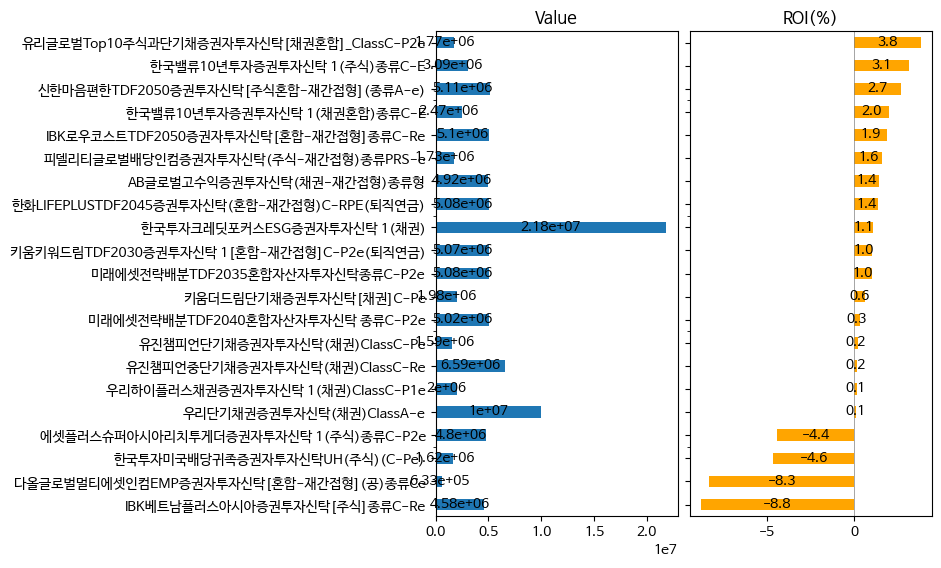

In [19]:
category = 'name2'
pm.summary(category=category, plot=True, roi=True, sort_by='roi')

# Transaction

## MMT

In [4]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-05-16 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_momentum_250515.csv loaded


In [61]:
# run after editting record file
#update = False
update = True
pf_mmt.update_record() if update else None

In [6]:
pf_mmt.view_record(-2, nshares=False)

name     ratio  transaction      net  weight  weight*  \
date       ticker                                                               
2025-04-16 000150         두산  0.994485     -2448000        0     0.0    0.000   
           003230       삼양식품  1.000000            0  2796000     0.2    0.196   
           012450  한화에어로스페이스  1.000000      -787999  2364000     0.2    0.165   
           042660       한화오션  0.989757      -468600  3045900     0.2    0.213   
           064350       현대로템  0.967033      -436800  3166800     0.2    0.222   
           329180    HD현대중공업  0.969780      2912000  2912000     0.2    0.204   
2025-05-15 003230       삼양식품  1.000000            0  2973000     0.2    0.180   
           012450  한화에어로스페이스  0.979738       838998  3356000     0.2    0.204   
           042660       한화오션  0.988336       244350  3420900     0.2    0.208   
           064350       현대로템  0.981914       113350  3400500     0.2    0.206   
           329180    HD현대중공업  1.000000            0  3332000     0.2    0.202   

                       date*  
date       ticker             
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17  
2025-05-15 003230 2025-05-16  
           012450 2025-05-16  
           042660 2025-05-16  
           064350 2025-05-16  
           329180 2025-05-16

*daily transactions for book keeping*

In [63]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

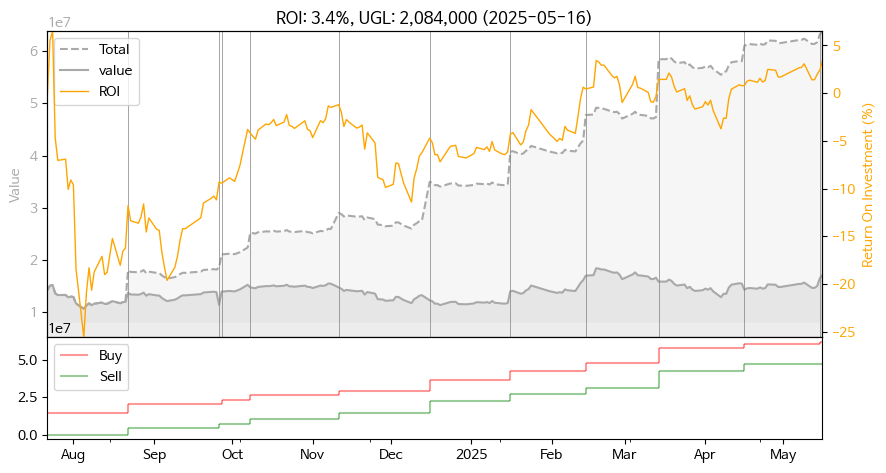

In [64]:
pf_mmt.plot(total=True)

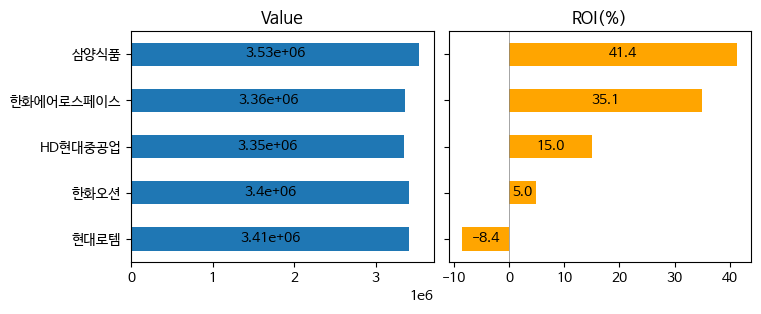

In [65]:
_ = pf_mmt.plot_assets(figsize=(8,3), exclude_sold=True)

In [66]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-05-16, 61756350, 46784778, 17055398, 2083825, 0.0337


start    2024-07-22
end      2025-05-16
buy      61,756,350
sell     46,784,778
value    17,055,398
ugl       2,083,825
roi          0.0337
dtype: object

In [53]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [54]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_mmt.transaction_halt(**kw) 

In [58]:
date_actual = '2025-05-16'
capital = WidgetTransaction.values(1)
capital = 0.12
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-05-08 to 2025-05-08
Weights of tickers determined by Equal weights.
Rebalancing with contribution 12% of the portfolio value (1,816,584)
Mean absolute error of weights: 4 %
Deployed capital: 1,174,799
ROI: 3.4%, UGL: 2,105,724 (2025-05-16)
Set save=True to save transaction record


In [59]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                         
2025-04-16 000150         두산  272000           -9    0     0.0    0.000   
           003230       삼양식품  932000            0    3     0.2    0.196   
           012450  한화에어로스페이스  788000           -1    3     0.2    0.165   
           042660       한화오션   78100           -6   39     0.2    0.213   
           064350       현대로템  109200           -4   29     0.2    0.222   
           329180    HD현대중공업  364000            8    8     0.2    0.204   
2025-05-15 003230       삼양식품  991000            0    3     0.2    0.182   
           012450  한화에어로스페이스  822000            1    4     0.2    0.202   
           042660       한화오션   80500            3   42     0.2    0.207   
           064350       현대로템  111300            1   30     0.2    0.205   
           329180    HD현대중공업  416500            0    8     0.2    0.204   

                       date*  
date       ticker             
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17  
2025-05-15 003230 2025-05-16  
           012450 2025-05-16  
           042660 2025-05-16  
           064350 2025-05-16  
           329180 2025-05-16

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [24]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-05-09 loaded


In [44]:
pf, date_actual = 'PER_2410', '2025-11-12'
#pf, date_actual = 'PER_2505', '2025-05-12'

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-05-14 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets


In [45]:
# run after editting record file
pf_per.update_record()

*Set assets to liquidate as delisted from KOSPI200*

In [46]:
tickers_liq = pf_per.check_universe()

In [47]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05    0.050   
           003030   세아제강지주  193300           -4    2    0.05    0.040   
           009970  영원무역홀딩스   85700           -5    4    0.05    0.045   
           016380     KG스틸    1012         -507  494    0.05    0.052   
           047040     대우건설    3635         -127  140    0.05    0.053   
           088350     한화생명    2864          180  180    0.05    0.054   
           078930       GS   41599           12   12    0.05    0.052   
           111770     영원무역   40150           11   11    0.05    0.050   
           139130  DGB금융지주    8250           63   63    0.05    0.054   
           005830   DB손해보험  106900            4    4    0.05    0.044   
           001450     현대해상   29750           17   17    0.05    0.053   
           009900     명신산업     991          500  500    0.05    0.052   
           241560     두산밥캣   40000           13   13    0.05    0.054   
           000270       기아   93600            5    5    0.05    0.049   
           024110     기업은행   14569           35   35    0.05    0.053   
           005850      에스엘   31350           16   16    0.05    0.052   
           316140   우리금융지주   16080           32   32    0.05    0.054   
           138930  BNK금융지주    9430           55   55    0.05    0.054   
           005380      현대차  209500            2    2    0.05    0.044   
           017800   현대엘리베이   46300            9    9    0.05    0.043   

                       date*  
date       ticker             
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [48]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-05-14, 12249374, 2617050, 10260148, 627824, 0.0513


start    2024-10-17
end      2025-05-14
buy      12,249,374
sell      2,617,050
value    10,260,148
ugl         627,824
roi          0.0513
dtype: object

In [49]:
#pf_per.update_record()
#pf_per.view_record(-2)

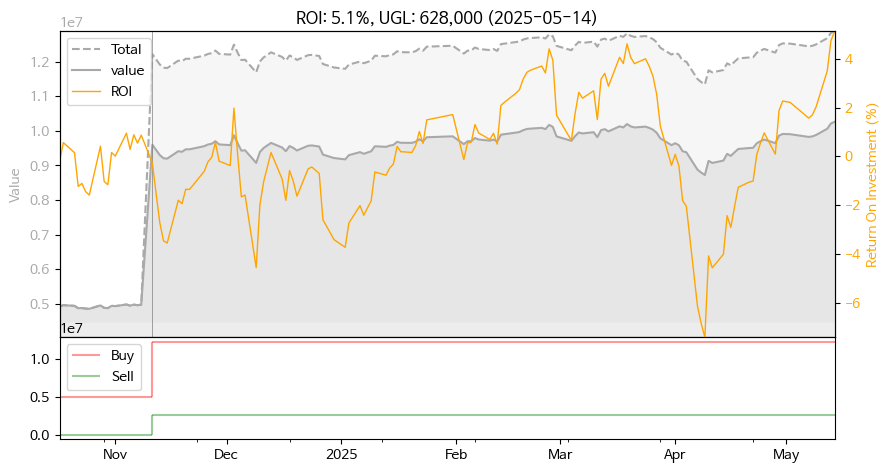

In [50]:
pf_per.plot()

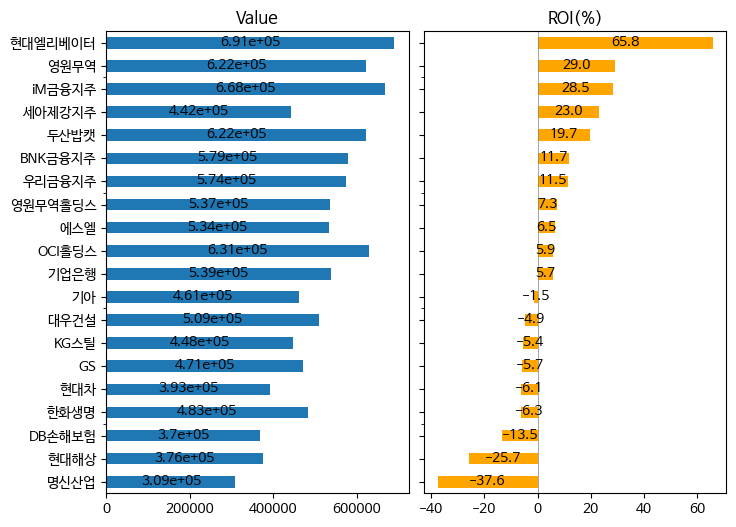

In [51]:
_ = pf_per.plot_assets(figsize=(8,6))

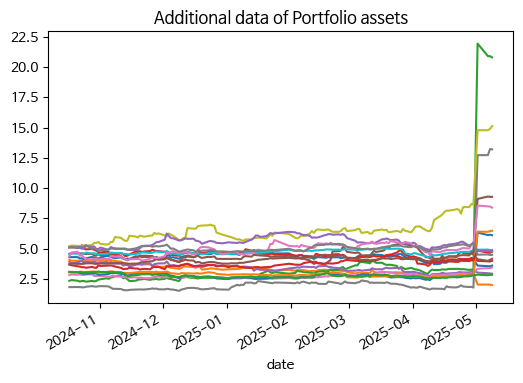

In [52]:
_ = pf_per.util_plot_additional(legend=False, figsize=(6,4))

In [53]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [54]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [25]:
kw = dict(
    sell = {'009900': 300000, '016380': 450000},
    #halt = tickers_liq, # testing
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_per.transaction_halt(**kw) 

In [38]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares = True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2025-03-10 to 2025-05-09
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 2 %
ROI: -0.2%, UGL: -29,615 (2025-05-09)
All transactions saved to pf_k200_per2_250509.csv


In [37]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-05-09 036460   한국가스공사   37800           21   21    0.05    0.049   
           003240     태광산업  825000            1    1    0.05    0.051   
           402340    SK스퀘어   93700            8    8    0.05    0.046   
           009240       한샘   41600           19   19    0.05    0.049   
           015760     한국전력   26950           30   30    0.05    0.050   
           006360     GS건설   17890           46   46    0.05    0.051   
           000660   SK하이닉스  190100            4    4    0.05    0.047   
           000210       DL   33450           24   24    0.05    0.050   
           001740   SK네트웍스    4155          198  198    0.05    0.051   
           178920   PI첨단소재   16410           50   50    0.05    0.051   
           005250   녹십자홀딩스   13840           59   59    0.05    0.051   
           002710    TCC스틸   19910           41   41    0.05    0.051   
           088350     한화생명    2645          311  311    0.05    0.051   
           001450     현대해상   21550           38   38    0.05    0.051   
           009970  영원무역홀딩스   98600            8    8    0.05    0.049   
           010060   OCI홀딩스   67000           12   12    0.05    0.050   
           047040     대우건설    3475          237  237    0.05    0.051   
           078930       GS   38750           21   21    0.05    0.050   
           326030   SK바이오팜   90400            9    9    0.05    0.050   
           005830   DB손해보험   90200            9    9    0.05    0.050   

                        date*  
date       ticker              
2025-05-09 036460  2025-05-12  
           003240  2025-05-12  
           402340  2025-05-12  
           009240  2025-05-12  
           015760  2025-05-12  
           006360  2025-05-12  
           000660  2025-05-12  
           000210  2025-05-12  
           001740  2025-05-12  
           178920  2025-05-12  
           005250  2025-05-12  
           002710  2025-05-12  
           088350  2025-05-12  
           001450  2025-05-12  
           009970  2025-05-12  
           010060  2025-05-12  
           047040  2025-05-12  
           078930  2025-05-12  
           326030  2025-05-12  
           005830  2025-05-12

In [ ]:
pf_per2 = PM.create_portfolio('PER_2410', **kw_cost)
df2 = pf_per2.valuate(total=False)
df = pf_per.valuate(total=False)
tkrs = df.index.difference(df2.index)
#df.loc[tkrs]
print(f'Number of new assets: {tkrs.size}')

## WTR
*modified all weather*

In [4]:
# pf & rebal date
#pf, date_actual = 'WTR_2407', '2025-08-14'
pf, date_actual = 'WTR_2412', '2025-06-18'

In [5]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-05-15 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_wtr2412_static_241218.csv loaded


In [6]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [7]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-12-18 069500             KODEX 200   31911           30   30  0.1667   
           379800      KODEX 미국S&P500TR   19415           50   50  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  116220            8    8  0.1667   
           411060            ACE KRX금현물   17120           57   57  0.1667   
           148070          KOSEF 국고채10년  114072            8    8  0.1667   
           284430        KODEX 200미국채혼합   12810           77   77  0.1667   

                   weight*      date*  
date       ticker                      
2024-12-18 069500    0.168 2024-12-19  
           379800    0.168 2024-12-19  
           273130    0.161 2024-12-19  
           411060    0.169 2024-12-19  
           148070    0.163 2024-12-19  
           284430    0.171 2024-12-19

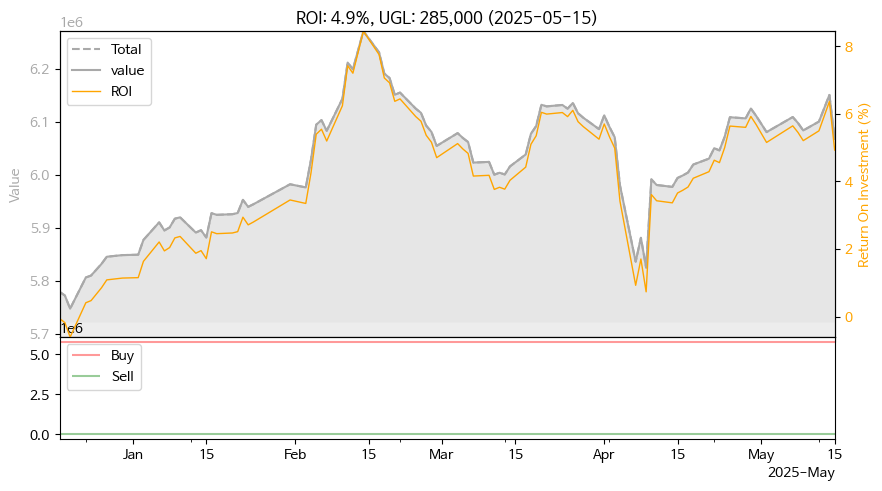

In [8]:
pf_wtr.plot(total=True)

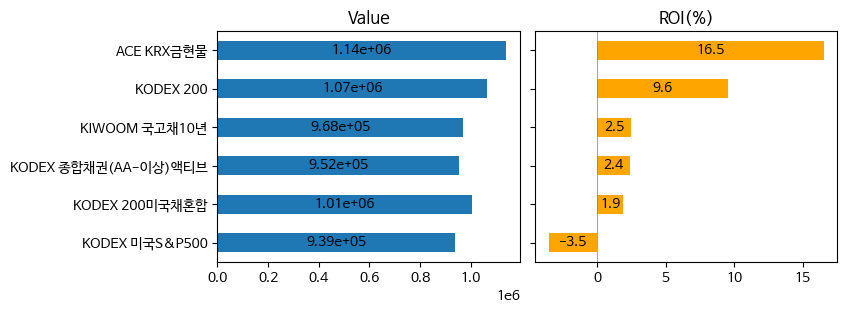

In [9]:
_ = pf_wtr.plot_assets(figsize=(8,3))

In [10]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-12-18, 2025-05-15, 5782957, 0.0, 6068118, 285161, 0.0493


start    2024-12-18
end      2025-05-15
buy       5,782,957
sell            0.0
value     6,068,118
ugl         285,161
roi          0.0493
dtype: object

In [11]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [12]:
#pf_wtr.performance(metrics=METRICS)

In [13]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [18]:
capital = WidgetTransaction.values(1)
#capital = 0.1
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_wtr.transaction_pipeline(**kw)
pf_wtr.view_record(-2, nshares=True)

6 tickers selected by Selected from 2025-05-15 to 2025-05-15
Weights of tickers determined by Equal weights.
Rebalancing with contribution 3,000,000
Mean absolute error of weights: 2 %
Deployed capital: 2,764,393
ROI: 3.3%, UGL: 283,557 (2025-05-15)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2024-12-18 069500             KODEX 200   31911           30   30  0.1667   
           148070          KOSEF 국고채10년  114072            8    8  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  116220            8    8  0.1667   
           284430        KODEX 200미국채혼합   12810           77   77  0.1667   
           379800      KODEX 미국S&P500TR   19415           50   50  0.1667   
           411060            ACE KRX금현물   17120           57   57  0.1667   
2025-05-15 069500             KODEX 200   35035           12   43  0.1667   
           148070         KIWOOM 국고채10년  116960            3   12  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  119060            4   12  0.1667   
           284430        KODEX 200미국채혼합   13060           38  115  0.1667   
           379800        KODEX 미국S&P500   18735           29   80  0.1667   
           411060            ACE KRX금현물   19960           18   75  0.1667   

                   weight*      date*  
date       ticker                      
2024-12-18 069500    0.168 2024-12-19  
           148070    0.163 2024-12-19  
           273130    0.161 2024-12-19  
           284430    0.171 2024-12-19  
           379800    0.168 2024-12-19  
           411060    0.169 2024-12-19  
2025-05-15 069500    0.170 2025-06-18  
           148070    0.159 2025-06-18  
           273130    0.162 2025-06-18  
           284430    0.170 2025-06-18  
           379800    0.170 2025-06-18  
           411060    0.169 2025-06-18

In [35]:
#pf_wtr.valuate(total=False)

## LIQ

In [104]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-01-03 loaded


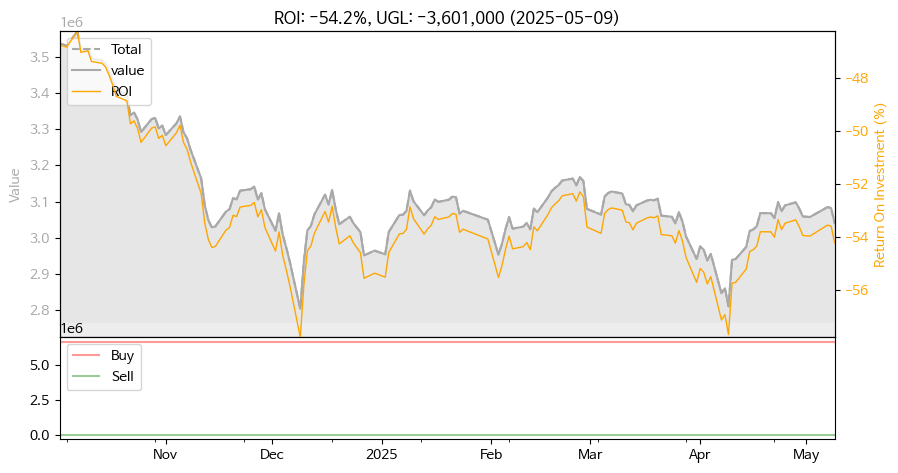

In [105]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

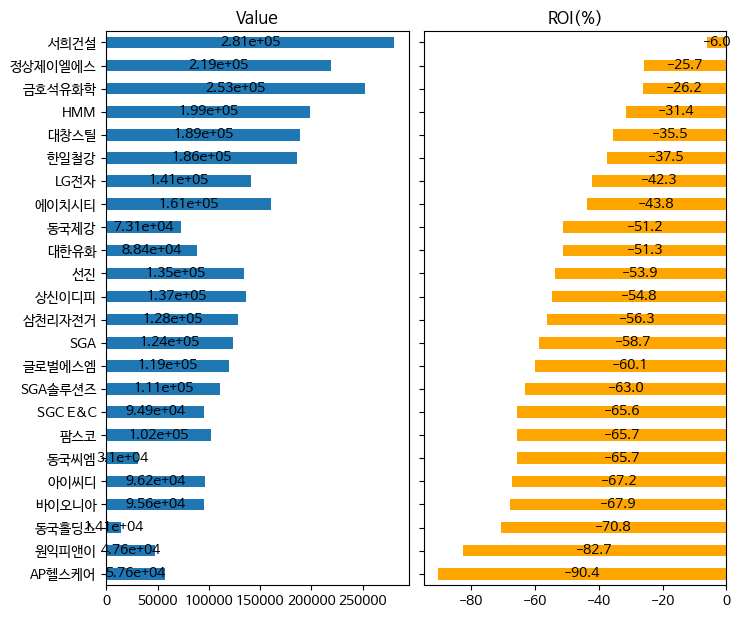

In [62]:
_ = pf_liq.plot_assets(figsize=(8,6))

In [106]:
pf_liq.valuate()

start    2024-01-03
end      2025-05-09
buy       6,641,836
sell            0.0
value     3,040,738
ugl      -3,601,098
roi          -0.542
dtype: object

In [60]:
#pf_liq.view_record()

## IRP

In [9]:
kw_st = dict(
    #security_names = fund_names
)

In [10]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)
pf_tdf.view_record(-1)

23 securities from 2023-03-29 to 2025-05-16 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_tdf_static_250421.csv loaded


name  ratio  \
date       ticker                                                             
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-04-21 K55101BV9571      6574306  6574306     NaN    0.142 2025-04-21  
           K55206C95800            0  4899682  0.1429    0.106 2024-04-17  
           K55213C50702            0  4823143  0.1429    0.105 2024-04-17  
           K55214CD4825      6574306  6574306     NaN    0.142 2025-04-21  
           K55234BY9966            0  4260709  0.1429    0.092 2024-04-17  
           K55234DF3150            0  4865649  0.1429    0.105 2024-04-17  
           K55301BU6139            0  4837744  0.1429    0.105 2024-04-17  
           K55301BU6253            0  4712837  0.1429    0.102 2024-04-17  
           K55364CF7048            0  4595360  0.1429    0.100 2024-04-17

In [11]:
#pf_tdf.check_universe()

In [12]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

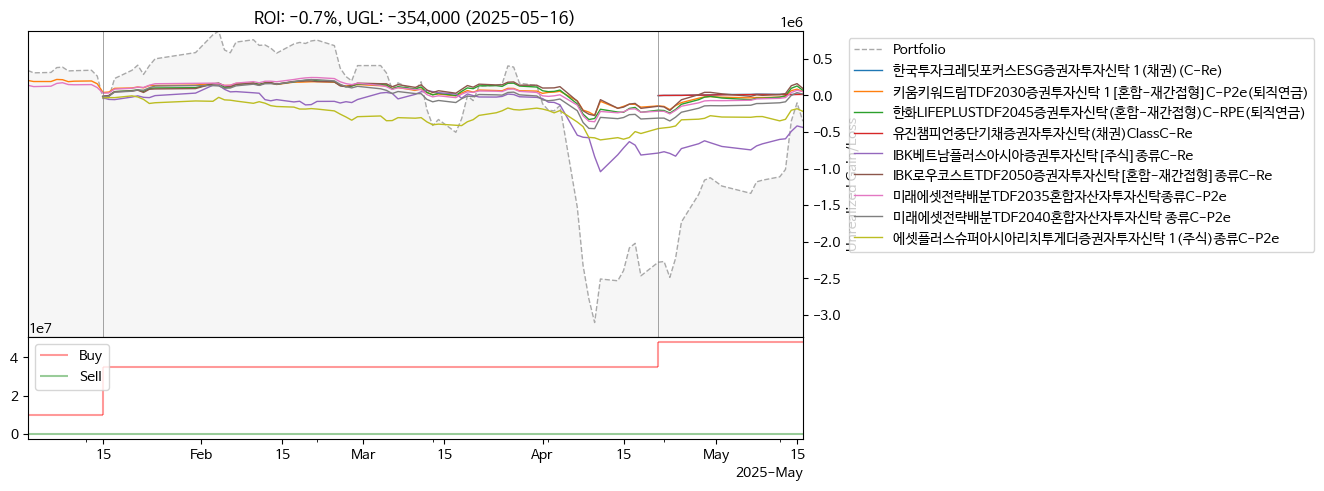

In [13]:
start = '2025-01-01'
pf_tdf.plot(start, total=False, roi=False)

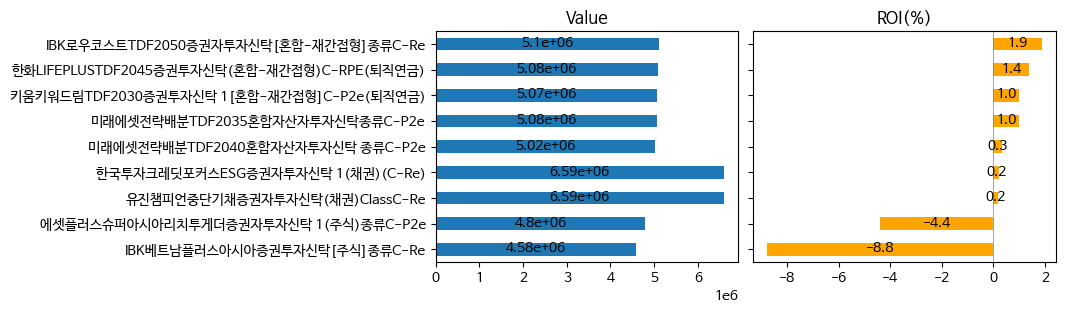

In [14]:
_ = pf_tdf.plot_assets(figsize=(8,3))

In [141]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-05-08, 48148612, -102860, 47070927, -1180545, -0.0245


start    2024-06-19
end      2025-05-08
buy      48,148,612
sell       -102,860
value    47,070,927
ugl      -1,180,545
roi         -0.0245
dtype: object

In [54]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [52]:
# new buy
date_actual='2024-04-17'
kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = {'K55214CD4825': 6574306, 'K55101BV9571':6574306}
)
#_ = pf_tdf.transaction_halt(**kw) 

In [53]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

9 tickers selected by Selected from 2025-05-02 to 2025-05-02
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: -1.8%, UGL: -917,666 (2025-05-02)
Set save=True to save transaction record


In [55]:
pf_tdf.view_record(-1)

name  ratio  \
date       ticker                                                             
2025-05-02 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-05-02 K55101BV9571     -1346266  5242850  0.1111    0.111 2025-05-02  
           K55206C95800       116263  5242850  0.1111    0.111 2025-05-02  
           K55213C50702       253272  5242850  0.1111    0.111 2025-05-02  
           K55214CD4825     -1341987  5242850  0.1111    0.111 2025-05-02  
           K55234BY9966       892520  5242850  0.1111    0.111 2025-05-02  
           K55234DF3150       207500  5242850  0.1111    0.111 2025-05-02  
           K55301BU6139       209773  5242850  0.1111    0.111 2025-05-02  
           K55301BU6253       361393  5242850  0.1111    0.111 2025-05-02  
           K55364CF7048       490383  5242850  0.1111    0.111 2025-05-02

## HANA

In [142]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [143]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

23 securities from 2023-03-29 to 2025-05-08 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [58]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

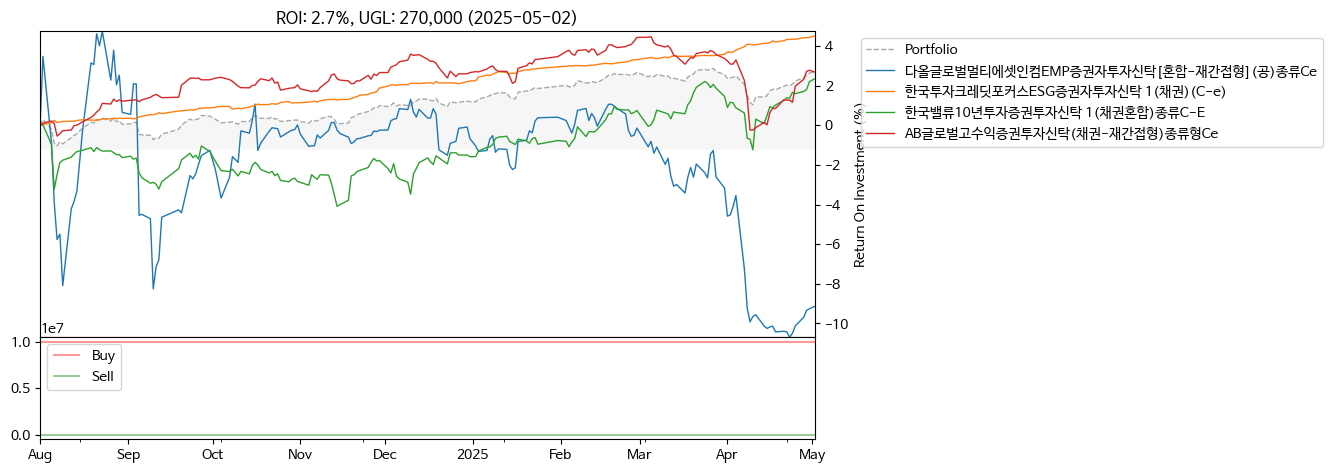

In [59]:
pf_hana.plot(total=False, roi=True)

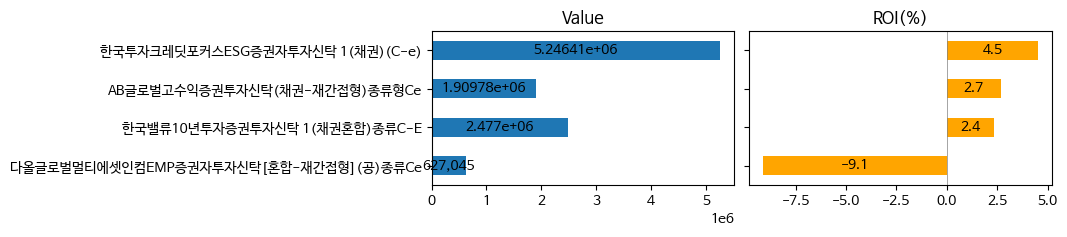

In [60]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

In [144]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-05-08, 9990000, 0.0, 10193310, 203310, 0.0204


start    2024-08-01
end      2025-05-08
buy       9,990,000
sell            0.0
value    10,193,310
ugl         203,310
roi          0.0204
dtype: object

In [20]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [21]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-04-17 to 2025-04-17
Weights of tickers determined by Inv.Vol.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 1.2%, UGL: 140,465 (2025-04-17)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-04-17 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-04-17 K55306CV9946      -217402   402756  0.0396    0.040 2025-04-17  
           KR5101888398      1420535  6653812  0.6542    0.654 2025-04-17  
           KR5236AS4826     -1060218  1381207  0.1358    0.136 2025-04-17  
           KR5370AP9956      -142916  1733003  0.1704    0.170 2025-04-17

## SAVE
연금저축

In [4]:
pf = 'SAVE_2503'

In [5]:
kw_st = dict(
    #security_names = fund_names
)

In [6]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record()

24 securities from 2023-03-29 to 2025-05-16 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_save_static_250421.csv loaded


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
2025-04-21 K55101D20874            0  1615880    0.25    0.154 2024-04-17  
           K55107BU0252      2000000  2000000     NaN    0.190 2025-04-21  
           K55206C11278            0  1976152    0.25    0.188 2024-04-17  
           K55214B30803      1584916  1584916     NaN    0.151 2025-04-21  
           K55307DH1659            0  1672578    0.25    0.159 2024-04-17  
           KR5235AK9808            0  1671996    0.25    0.159 2024-04-17

In [7]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
pf_save.update_record()

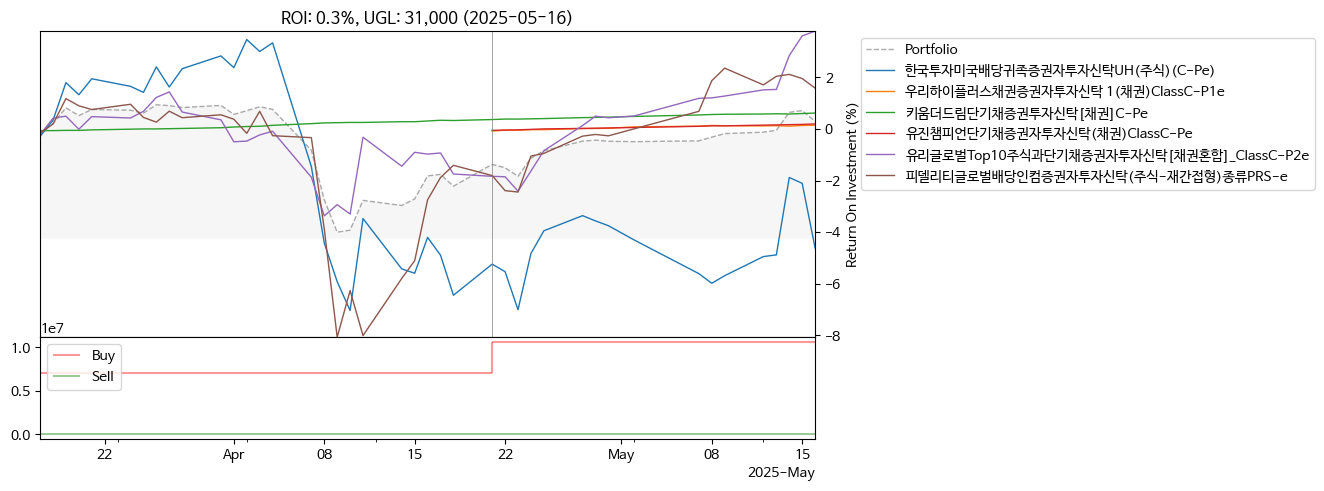

In [8]:
pf_save.plot(total=False, roi=True)

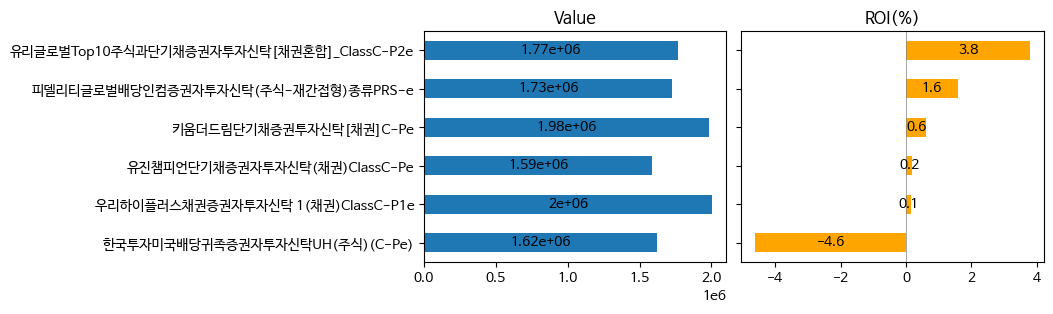

In [9]:
_ = pf_save.plot_assets(figsize=(8,3))

In [10]:
date = None
pf_save.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-03-17, 2025-05-16, 10652630, -3481, 10687182, 31071, 0.00292


start    2025-03-17
end      2025-05-16
buy      10,652,630
sell         -3,481
value    10,687,182
ugl          31,071
roi         0.00292
dtype: object

In [9]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
date_actual='2024-06-18'

kw = dict(
    #buy = {'K55107BU0252':2000000, 'K55214B30803':1584916},
    buy = {'K55307DH1659':2e6, 'KR5235AK9808':2e6, 'K55363DD7958':4e6},
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)
_ = pf_save.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-05-16
Ticker names of None updated
Set save=True to save transaction record
ROI: 0.1%, UGL: 27,901 (2025-05-16)


In [13]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    date_actual = date_actual
)
_ = pf_save.transaction_pipeline(**kwargs)

6 tickers selected by Selected from 2024-11-18 to 2025-05-16
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
Residual cash: 3
ROI: 0.3%, UGL: 27,902 (2025-05-16)
Set save=True to save transaction record


In [12]:
pf_save.view_record()

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-05-16 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           K55363DD7958          트러스톤ESG지배구조레벨업증권자투자신탁[주식]Cp-E클래스      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
2025-04-21 K55101D20874            0  1615880    0.25    0.154 2024-04-17  
           K55107BU0252      2000000  2000000     NaN    0.190 2025-04-21  
           K55206C11278            0  1976152    0.25    0.188 2024-04-17  
           K55214B30803      1584916  1584916     NaN    0.151 2025-04-21  
           K55307DH1659            0  1672578    0.25    0.159 2024-04-17  
           KR5235AK9808            0  1671996    0.25    0.159 2024-04-17  
2025-05-16 K55101D20874            0  1626497    0.25    0.087 2024-06-18  
           K55107BU0252            0  2004546     NaN    0.107 2024-06-18  
           K55206C11278            0  1981105    0.25    0.106 2024-06-18  
           K55214B30803            0  1588828     NaN    0.085 2024-06-18  
           K55307DH1659      2000000  3768252    0.25    0.202 2024-06-18  
           K55363DD7958      4000000  4000000     NaN    0.214 2025-05-16  
           KR5235AK9808      2000000  3729644    0.25    0.199 2024-06-18

## FISA

In [9]:
kw_st = dict(
    method_select = 'selected'    
)

In [10]:
pf_fisa = PM.create_portfolio('FISA_2504', **kw_st, **kw_cost)
pf_fisa.view_record()

23 securities from 2023-03-29 to 2025-05-16 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_fisa_static_250429.csv loaded


name  ratio  \
date       ticker                                                       
2025-04-28 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
2025-04-29 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-04-28 K55107BB0404     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5101888398     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5236AS4818      3000000   3000000  0.0968    0.130 2024-04-25  
2025-04-29 K55107BB0404            0  10000934  0.3226    0.323 2024-04-25  
           K55210CO3737      5000000   5000000     NaN    0.161 2025-04-25  
           KR5101888398            0  10000000  0.3226    0.323 2024-04-25  
           KR5236AS4818            0   2990013  0.0968    0.096 2024-04-25  
           KR5370AP9949      3000000   3000000     NaN    0.097 2025-04-25

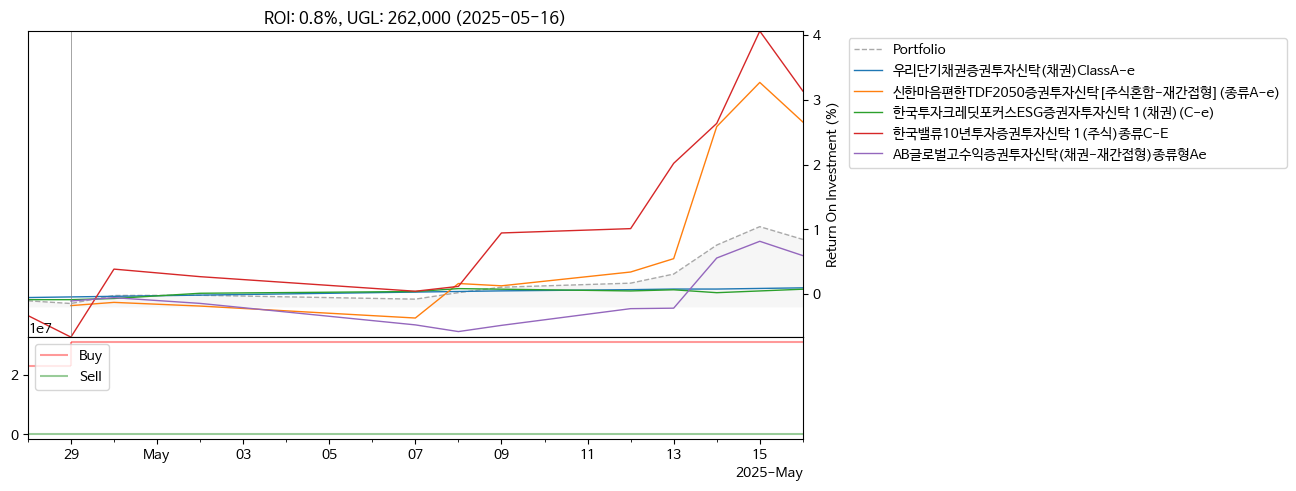

In [11]:
pf_fisa.plot(total=False, roi=True)

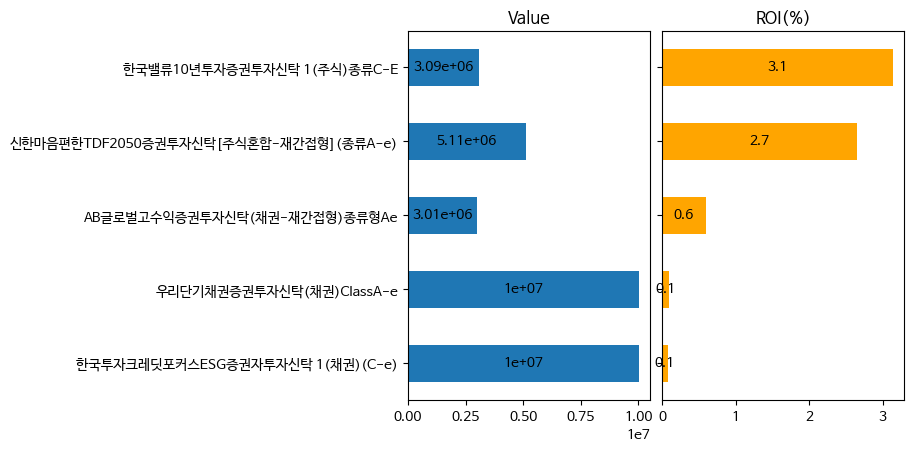

In [12]:
_ = pf_fisa.plot_assets(roi=True)

In [129]:
date = None
pf_fisa.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-28, 2025-05-08, 30960600, -252.0, 30969738, 8886, 0.000287


start    2025-04-28
end      2025-05-08
buy      30,960,600
sell         -252.0
value    30,969,738
ugl           8,886
roi        0.000287
dtype: object

In [23]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
date_actual='2024-04-25'

# new buy
tickers = ['K55210CO3737','KR5370AP9949']
capital = [5e6, 3e6]
capital = dict(zip(tickers, capital))

kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = capital
)

_ = pf_fisa.transaction_halt(**kw) 
pf_fisa.view_record()

ERROR: No transaction record exits
ERROR: No transaction record


In [16]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    #date_actual = date_actual
)
_ = pf_fisa.transaction_pipeline(**kwargs)

23 tickers selected by All from 2024-10-30 to 2025-04-30
Weights of tickers determined by Equal weights.
ERROR: Neither capital nor tickers to rebalance exists


## TEST

In [41]:
tkrs = ['K55303CK1428', 'KR5207AW8081']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally', 'unit_fund': True}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

288 securities from 2023-03-27 to 2025-04-23 uploaded.
Master data for 300 funds loaded.
Price data loaded
Cost data transaction_cost_250424.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [45]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [50]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

2 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.7%, UGL: 168,854 (2025-04-23)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2025-01-31 K55303CK1428                마이다스우량채권증권자투자신탁 1(채권)Ce      1   
           KR5207AW8081  교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55303CK1428      5000000  5000000     0.5      0.5 2025-01-31  
           KR5207AW8081      5000000  5000000     0.5      0.5 2025-01-31

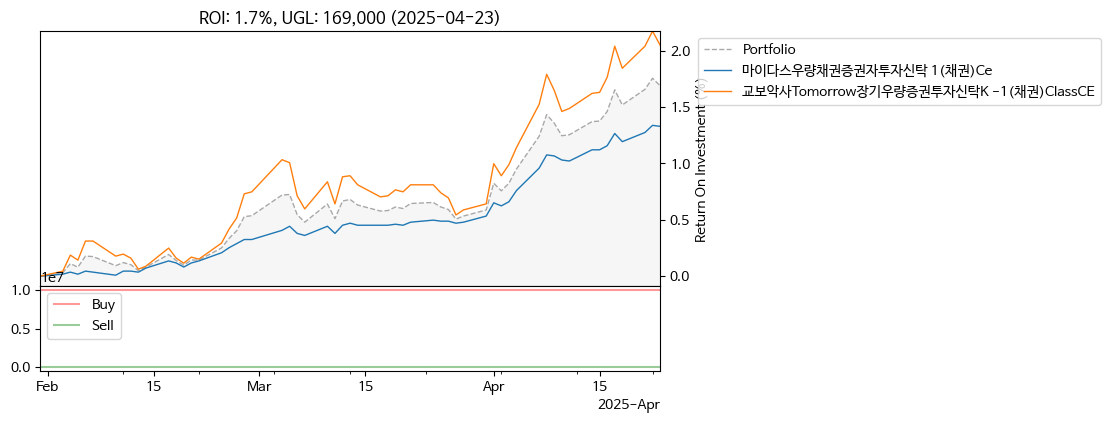

In [51]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

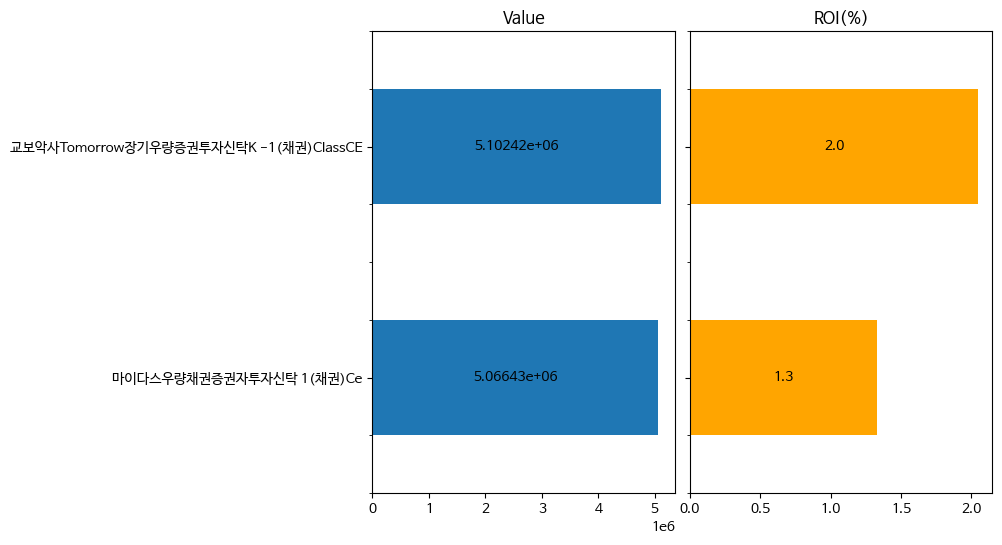

In [52]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing

In [107]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record()

24 securities from 2023-03-29 to 2025-05-16 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_save_static_250421.csv loaded


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
2025-04-21 K55101D20874            0  1615880    0.25    0.154 2024-04-17  
           K55107BU0252      2000000  2000000     NaN    0.190 2025-04-21  
           K55206C11278            0  1976152    0.25    0.188 2024-04-17  
           K55214B30803      1584916  1584916     NaN    0.151 2025-04-21  
           K55307DH1659            0  1672578    0.25    0.159 2024-04-17  
           KR5235AK9808            0  1671996    0.25    0.159 2024-04-17

In [118]:
def transaction_halt(self, date=None, save=False, **kw_halt):
    """
    create transaction with TradingHalts instance
    kw_halt: kwargs for tradinghalts.transaction
    """
    record = self.record
    if record is None:
        return print('ERROR: No transaction record exits')
    else:
        self.df_rec = None # reset prv transaction if any
    date = self._get_data(0, 0, date=date).index.max()
    # get values of assets on the date for tradinghalts
    sr_net = self.valuate(total=False, date=date, exclude_cost=True, int_to_str=False)
    sr_net = sr_net['value']
    print(sr_net)
    recs = self.tradinghalts.transaction(date, date_format=self.date_format, 
                                         values_on_date=sr_net, **kw_halt) 
    if recs is not None: # new transaction created
        df_rec, record_halt = recs
        #return df_rec
        
        df_rec = self._update_ticker_name(df_rec) # update name for buy case.
        #return df_rec
        
        # save before recover
        #self.df_rec = df_rec.copy()
        self.df_rec = df_rec
        #return df_rec
        
        # recover record with halt before saving or converting to record with num of shares
        df_rec = self.tradinghalts.recover(df_rec, record_halt)
        if save:
            self.save_transaction(df_rec) # where self.record updated
        else:
            print('Set save=True to save transaction record')
        _ = self.valuate(total=True, int_to_str=True, print_summary_only=True)
        return df_rec
    else:
        return print('Nothing to save')

In [121]:
date_actual='2024-06-18'

kw = dict(
    #buy = {'K55107BU0252':2000000, 'K55214B30803':1584916},
    buy = {'K55307DH1659':2e6, 'KR5235AK9808':2e6, 'K55363DD7958':4e6},
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)
_ = transaction_halt(pf_save, **kw) 

ticker
K55307DH1659    1768252
KR5235AK9808    1729644
K55206C11278    1981105
K55107BU0252    2004546
K55214B30803    1588828
K55101D20874    1626497
Name: value, dtype: int64
REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-05-16
Ticker names of None updated
Set save=True to save transaction record
ROI: 0.1%, UGL: 27,901 (2025-05-16)


In [122]:
_

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-05-16 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           K55363DD7958          트러스톤ESG지배구조레벨업증권자투자신탁[주식]Cp-E클래스      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction        net  weight      date*  price  
date       ticker                                                          
2025-03-17 K55101D20874    1700000.0  1700000.0    0.25 2025-03-13    NaN  
           K55206C11278    1967714.0  1967714.0    0.25 2025-03-13    NaN  
           K55307DH1659    1700000.0  1700000.0    0.25 2025-03-13    NaN  
           KR5235AK9808    1700000.0  1700000.0    0.25 2025-03-13    NaN  
2025-04-21 K55101D20874          0.0  1615880.0    0.25 2024-04-17    NaN  
           K55107BU0252    2000000.0  2000000.0     NaN 2025-04-21    NaN  
           K55206C11278          0.0  1976152.0    0.25 2024-04-17    NaN  
           K55214B30803    1584916.0  1584916.0     NaN 2025-04-21    NaN  
           K55307DH1659          0.0  1672578.0    0.25 2024-04-17    NaN  
           KR5235AK9808          0.0  1671996.0    0.25 2024-04-17    NaN  
2025-05-16 K55101D20874          0.0  1626497.0    0.25 2024-06-18    NaN  
           K55107BU0252          0.0  2004546.0     NaN 2024-06-18    NaN  
           K55206C11278          0.0  1981105.0    0.25 2024-06-18    NaN  
           K55214B30803          0.0  1588828.0     NaN 2024-06-18    NaN  
           K55307DH1659    2000000.0  3768252.0    0.25 2024-06-18    NaN  
           K55363DD7958    4000000.0  4000000.0     NaN 2025-05-16    NaN  
           KR5235AK9808    2000000.0  3729644.0    0.25 2024-06-18    NaN

In [29]:
record = pf_save.record.copy()
record

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight      date*  price  
date       ticker                                                        
2025-03-17 K55101D20874      1700000  1700000    0.25 2025-03-13    NaN  
           K55206C11278      1967714  1967714    0.25 2025-03-13    NaN  
           K55307DH1659      1700000  1700000    0.25 2025-03-13    NaN  
           KR5235AK9808      1700000  1700000    0.25 2025-03-13    NaN  
2025-04-21 K55101D20874            0  1615880    0.25 2024-04-17    NaN  
           K55107BU0252      2000000  2000000     NaN 2025-04-21    NaN  
           K55206C11278            0  1976152    0.25 2024-04-17    NaN  
           K55214B30803      1584916  1584916     NaN 2025-04-21    NaN  
           K55307DH1659            0  1672578    0.25 2024-04-17    NaN  
           KR5235AK9808            0  1671996    0.25 2024-04-17    NaN

In [30]:
import pandas as pd

buy = {'K55107BU0252': 2000000, 'K55101D20874':1615880, 'K55206C11278':1976152}
idx = pd.IndexSlice
date = '2025-04-21'
#tkr = pd.Index(buy.keys())
tkr = pd.Index(['K55107BU0252', 'K55101D20874'])
col_net = 'net'
#record.loc[idx[date, tkr], ['net']].apply(lambda x: buy[x.index.get_level_values('ticker')], axis=1)
record.loc[idx[date, tkr], ['transaction','net']]

transaction      net
date       ticker                            
2025-04-21 K55107BU0252      2000000  2000000
           K55101D20874            0  1615880

In [31]:
buy_series = pd.Series(buy).rename_axis('ticker')
for x in ['transaction', 'net']:
    record.loc[idx[date, tkr], x] += buy_series
record

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight      date*  price  
date       ticker                                                        
2025-03-17 K55101D20874      1700000  1700000    0.25 2025-03-13    NaN  
           K55206C11278      1967714  1967714    0.25 2025-03-13    NaN  
           K55307DH1659      1700000  1700000    0.25 2025-03-13    NaN  
           KR5235AK9808      1700000  1700000    0.25 2025-03-13    NaN  
2025-04-21 K55101D20874      1615880  3231760    0.25 2024-04-17    NaN  
           K55107BU0252      4000000  4000000     NaN 2025-04-21    NaN  
           K55206C11278            0  1976152    0.25 2024-04-17    NaN  
           K55214B30803      1584916  1584916     NaN 2025-04-21    NaN  
           K55307DH1659            0  1672578    0.25 2024-04-17    NaN  
           KR5235AK9808            0  1671996    0.25 2024-04-17    NaN

In [23]:
#record.loc[idx[date, tkr], ['transaction','net']] + pd.Series(buy).rename_axis('ticker')
record.loc[idx[date, tkr], ['transaction','net']].
pd.Series(buy).rename_axis('ticker')

ticker
K55107BU0252    2000000
K55101D20874    1615880
K55206C11278    1976152
dtype: int64

In [24]:
for x in ['transaction','net']:
    record.loc[idx[date, tkr], x] += pd.Series(buy).rename_axis('ticker')
record

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight      date*  price  
date       ticker                                                        
2025-03-17 K55101D20874      1700000  1700000    0.25 2025-03-13    NaN  
           K55206C11278      1967714  1967714    0.25 2025-03-13    NaN  
           K55307DH1659      1700000  1700000    0.25 2025-03-13    NaN  
           KR5235AK9808      1700000  1700000    0.25 2025-03-13    NaN  
2025-04-21 K55101D20874      1615880  3231760    0.25 2024-04-17    NaN  
           K55107BU0252      4000000  4000000     NaN 2025-04-21    NaN  
           K55206C11278            0  1976152    0.25 2024-04-17    NaN  
           K55214B30803      1584916  1584916     NaN 2025-04-21    NaN  
           K55307DH1659            0  1672578    0.25 2024-04-17    NaN  
           KR5235AK9808            0  1671996    0.25 2024-04-17    NaN

In [47]:
record.loc[idx[date, tkr], 'net'] += record.loc[idx[date, tkr], 'net'].index.get_level_values('ticker').map(buy)
record

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight      date*  price  
date       ticker                                                        
2025-03-17 K55101D20874      1700000  1700000    0.25 2025-03-13    NaN  
           K55206C11278      1967714  1967714    0.25 2025-03-13    NaN  
           K55307DH1659      1700000  1700000    0.25 2025-03-13    NaN  
           KR5235AK9808      1700000  1700000    0.25 2025-03-13    NaN  
2025-04-21 K55101D20874            0  3231760    0.25 2024-04-17    NaN  
           K55107BU0252      2000000  4000000     NaN 2025-04-21    NaN  
           K55206C11278            0  3952304    0.25 2024-04-17    NaN  
           K55214B30803      1584916  1584916     NaN 2025-04-21    NaN  
           K55307DH1659            0  1672578    0.25 2024-04-17    NaN  
           KR5235AK9808            0  1671996    0.25 2024-04-17    NaN

In [49]:
pd.Series(buy)

K55107BU0252    2000000
K55101D20874    1615880
K55206C11278    1976152
dtype: int64

In [36]:
record['net'] += record.index.get_level_values('ticker').map(buy).fillna(0)
record

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction        net  weight      date*  price  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  3315880.0    0.25 2025-03-13    NaN  
           K55206C11278      1967714  3943866.0    0.25 2025-03-13    NaN  
           K55307DH1659      1700000  1700000.0    0.25 2025-03-13    NaN  
           KR5235AK9808      1700000  1700000.0    0.25 2025-03-13    NaN  
2025-04-21 K55101D20874            0  3231760.0    0.25 2024-04-17    NaN  
           K55107BU0252      2000000  4000000.0     NaN 2025-04-21    NaN  
           K55206C11278            0  3952304.0    0.25 2024-04-17    NaN  
           K55214B30803      1584916  1584916.0     NaN 2025-04-21    NaN  
           K55307DH1659            0  1672578.0    0.25 2024-04-17    NaN  
           KR5235AK9808            0  1671996.0    0.25 2024-04-17    NaN

In [37]:
record['net']

date        ticker      
2025-03-17  K55101D20874    3315880.0
            K55206C11278    3943866.0
            K55307DH1659    1700000.0
            KR5235AK9808    1700000.0
2025-04-21  K55101D20874    3231760.0
            K55107BU0252    4000000.0
            K55206C11278    3952304.0
            K55214B30803    1584916.0
            K55307DH1659    1672578.0
            KR5235AK9808    1671996.0
Name: net, dtype: float64

In [ ]:
record.loc[idx[date, tkr], col_net] = record.loc[idx[date, tkr], col_net].apply(lambda x: x + buy[x])

In [11]:
date_actual='2024-04-17'

kw = dict(
    #buy = {'K55107BU0252':2000000, 'K55214B30803':1584916},
    buy = {'K55307DH1659':2e6, 'KR5235AK9808':2e6, 'K55363DD7958':4e6},
    #buy = {'K55363DD7958':4e6},
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)
#_ = pf_save.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
ERROR: K55307DH1659, KR5235AK9808 to buy in the latest transaction
Nothing to save


In [12]:
def transaction_halt(self, date=None, save=False, **kw_halt):
    """
    create transaction with TradingHalts instance
    kw_halt: kwargs for tradinghalts.transaction
    """
    if self.record is None:
        return print('ERROR: No transaction record exits')
    date = self._get_data(0, 0, date=date).index.max()
    return self.tradinghalts.transaction(date, date_format=self.date_format, **kw_halt) 


transaction_halt(pf_save, **kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
ERROR: K55307DH1659, KR5235AK9808 to buy in the latest transaction


In [13]:
def transaction(self, date, buy=None, sell=None, resume=None, halt=None, 
                date_actual=None, values_on_date=None, date_format='%Y-%m-%d'):
    """
    make new transaction from the latest transaction without price data
    buy: dict of tickers to total buy price
    halt: list of tickers to halt
    sell: dict of tickers to total sell price or list 
    resume: dict, list, 'all' 
    values_on_date: dict/series of asset to value on the new transaction date
    """
    record = None if self.record is None else self.record.copy()
    if record is None:
        return print('REMINDER: No record to start with')
    else:
        record_halt = None if self.record_halt is None else self.record_halt.copy()

    date_lt = self.date_lt
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_tkr = cols_record['tkr']
    col_trs = cols_record['trs']
    col_net = cols_record['net']
    col_rat = cols_record['rat']
    col_dttr = cols_record['dttr']
    idx = pd.IndexSlice
    print_reminder = lambda x: print(f'REMINDER: For the {x} price, use the total amount, not the unit price.')

    # set transaction date
    date = pd.to_datetime(date)
    if date <= date_lt:
        dt1, dt2 = [x.strftime(date_format) for x in [date, date_lt]]
        return print(f'ERROR: set date ({dt1}) after the latest transaction date {dt2}')

    # move tickers to sell first to record if in record_halt 
    if sell is not None: 
        tickers = sell.keys() if isinstance(sell, dict) else sell
        record, record_halt = self._free_halt(tickers, record, record_halt, msg=False)

    # update record for resume
    if resume is not None:
        if resume == 'all':
            tickers = None # resume all in halt
            resume = None # set to None to skip later net update
        else:
            if isinstance(resume, list):
                tickers = resume
                resume = None # set to None to skip later update
            else:
                tickers = resume.keys()
        record, record_halt = self._free_halt(tickers, record, record_halt)

    # update record for halt
    if halt is not None:
        record, record_halt = self._set_to_halt(halt, record, record_halt)
    
    # copy record of date_lt to date
    # cast date_actual of new transaction to datetime like existing transactions 
    date_actual = date if date_actual is None else pd.to_datetime(date_actual)
    kw = {col_date:date, col_trs:0, col_rat:1, col_dttr:date_actual}
    record_date_lt = record.loc[date_lt, :]
    record_date = (record_date_lt.loc[record_date_lt[col_net] > 0].assign(**kw)
                       .set_index(col_date, append=True).reorder_levels([col_date, col_tkr]))
    # update value of assets on the date
    if isinstance(values_on_date, dict):
        values_on_date = pd.Series(values_on_date)
    if isinstance(values_on_date, pd.Series):
        if record_date.index.get_level_values(col_tkr).difference(values_on_date.index).size > 0:
            print('WARNING: No update of net as missing assets in values_on_date')
        else:
            values_on_date = (values_on_date.rename_axis(col_tkr).to_frame(col_net)
                              .assign(**{col_date:date}) # date is datetime
                              .set_index(col_date, append=True).swaplevel())
            record_date.update(values_on_date)
    else:
        print(f'WARNING: No update of net on {date.strftime(date_format)}')
    record = pd.concat([record, record_date]).sort_index()

    return record

    if buy is not None:
        print_reminder('buy')
        tkr = record.loc[date].index.intersection(buy.keys())
        if record_halt is not None:
            tkr2 = record_halt.loc[date_lt].index.map(self.toggle_prefix).intersection(buy.keys())
            tkr = tkr.union(tkr2)
        if tkr.size > 0:
            return self._print_tickers(tkr, 'ERROR: {} to buy in the latest transaction')
        
        index = pd.MultiIndex.from_product([[date], buy.keys()], names=[col_date, col_tkr])
        kw = {col_rat:1, col_dttr:date}
        df_buy = (pd.DataFrame([buy, buy], index=[col_trs, col_net]).T
                  .set_index(index).assign(**kw))
        record = pd.concat([record, df_buy]).sort_index()

In [28]:
kw = dict(
    #buy = {'K55107BU0252':2000000, 'K55214B30803':1584916},
    buy = {'K55307DH1659':2e6, 'KR5235AK9808':2e6, 'K55363DD7958':4e6},
    #buy = {'K55363DD7958':4e6},
    #date = WidgetTransaction.values(0),
    #save = WidgetTransaction.values(2),
    date_actual=date_actual
)

import pandas as pd

date = '2025-05-01'
date = pf_save._get_data(0, 0, date=date).index.max()
date

Timestamp('2025-04-30 00:00:00')

In [30]:
#values_on_date = None
df = pf_save.valuate(total=False, date=date, exclude_cost=True, int_to_str=False)
values_on_date = df['value'].to_dict()
values_on_date

{'K55307DH1659': 1711149,
 'K55206C11278': 1977986,
 'K55107BU0252': 2002182,
 'K55214B30803': 1586365,
 'KR5235AK9808': 1698175,
 'K55101D20874': 1641197}

In [22]:
transaction(pf_save.tradinghalts, values_on_date=values_on_date, date_format='%Y-%m-%d', date=date, **kw)

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-05-16 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight      date*  price  
date       ticker                                                        
2025-03-17 K55101D20874      1700000  1700000    0.25 2025-03-13    NaN  
           K55206C11278      1967714  1967714    0.25 2025-03-13    NaN  
           K55307DH1659      1700000  1700000    0.25 2025-03-13    NaN  
           KR5235AK9808      1700000  1700000    0.25 2025-03-13    NaN  
2025-04-21 K55101D20874            0  1615880    0.25 2024-04-17    NaN  
           K55107BU0252      2000000  2000000     NaN 2025-04-21    NaN  
           K55206C11278            0  1976152    0.25 2024-04-17    NaN  
           K55214B30803      1584916  1584916     NaN 2025-04-21    NaN  
           K55307DH1659            0  1672578    0.25 2024-04-17    NaN  
           KR5235AK9808            0  1671996    0.25 2024-04-17    NaN  
2025-05-16 K55101D20874            0  1615880    0.25 2024-04-17    NaN  
           K55107BU0252            0  2000000     NaN 2024-04-17    NaN  
           K55206C11278            0  1976152    0.25 2024-04-17    NaN  
           K55214B30803            0  1584916     NaN 2024-04-17    NaN  
           K55307DH1659            0  1672578    0.25 2024-04-17    NaN  
           KR5235AK9808            0  1671996    0.25 2024-04-17    NaN

In [31]:
transaction(pf_save.tradinghalts, values_on_date=values_on_date, date_format='%Y-%m-%d', date=date, **kw)

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-30 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight      date*  price  
date       ticker                                                        
2025-03-17 K55101D20874      1700000  1700000    0.25 2025-03-13    NaN  
           K55206C11278      1967714  1967714    0.25 2025-03-13    NaN  
           K55307DH1659      1700000  1700000    0.25 2025-03-13    NaN  
           KR5235AK9808      1700000  1700000    0.25 2025-03-13    NaN  
2025-04-21 K55101D20874            0  1615880    0.25 2024-04-17    NaN  
           K55107BU0252      2000000  2000000     NaN 2025-04-21    NaN  
           K55206C11278            0  1976152    0.25 2024-04-17    NaN  
           K55214B30803      1584916  1584916     NaN 2025-04-21    NaN  
           K55307DH1659            0  1672578    0.25 2024-04-17    NaN  
           KR5235AK9808            0  1671996    0.25 2024-04-17    NaN  
2025-04-30 K55101D20874            0  1641197    0.25 2024-04-17    NaN  
           K55107BU0252            0  2002182     NaN 2024-04-17    NaN  
           K55206C11278            0  1977986    0.25 2024-04-17    NaN  
           K55214B30803            0  1586365     NaN 2024-04-17    NaN  
           K55307DH1659            0  1711149    0.25 2024-04-17    NaN  
           KR5235AK9808            0  1698175    0.25 2024-04-17    NaN

In [19]:
date

Timestamp('2025-05-16 00:00:00')

In [101]:
date = '2025-05-15'
df = pf_mmt.record.loc[date:, :]
df

name     ratio  transaction      net  weight  \
date       ticker                                                      
2025-05-15 003230       삼양식품  1.000000            0  2973000     0.2   
           012450  한화에어로스페이스  0.979738       838998  3356000     0.2   
           042660       한화오션  0.988336       244350  3420900     0.2   
           064350       현대로템  0.981914       113350  3400500     0.2   
           329180    HD현대중공업  1.000000            0  3332000     0.2   

                       date*  price  
date       ticker                    
2025-05-15 003230 2025-05-16    NaN  
           012450 2025-05-16    NaN  
           042660 2025-05-16    NaN  
           064350 2025-05-16    NaN  
           329180 2025-05-16    NaN

In [102]:
df2 = pf_mmt.valuate(total=False, date='2025-05-01', exclude_cost=True, int_to_str=False)
val = df2['value'].to_dict()
val

{'012450': 2391000.0,
 '003230': 2910000.0,
 '329180': 3216000.0,
 '042660': 3061500.0,
 '064350': 3253800.0,
 '000150': 0.0}

In [105]:
sr = pd.Series(val).rename_axis('ticker').to_frame('net').assign(date=pd.Timestamp('2025-05-15')).set_index('date', append=True).swaplevel()
df.update(sr)
df

name     ratio  transaction      net  weight  \
date       ticker                                                      
2025-05-15 003230       삼양식품  1.000000            0  2910000     0.2   
           012450  한화에어로스페이스  0.979738       838998  2391000     0.2   
           042660       한화오션  0.988336       244350  3061500     0.2   
           064350       현대로템  0.981914       113350  3253800     0.2   
           329180    HD현대중공업  1.000000            0  3216000     0.2   

                       date*  price  
date       ticker                    
2025-05-15 003230 2025-05-16    NaN  
           012450 2025-05-16    NaN  
           042660 2025-05-16    NaN  
           064350 2025-05-16    NaN  
           329180 2025-05-16    NaN

In [38]:
#df.update(pd.Series(val).to_frame('net').assign(date=date).set_index(date, append=True))
#df.update(pd.Series(val).rename_axis('ticker').rename('net'))
df.update(pd.Series(val).rename_axis('ticker').to_frame('net').assign(date=date).set_index('date', append=True))
#df.update(pd.Series(val))
df

name     ratio  transaction      net  weight  \
date       ticker                                                      
2025-05-15 003230       삼양식품  1.000000            0  2973000     0.2   
           012450  한화에어로스페이스  0.979738       838998  3356000     0.2   
           042660       한화오션  0.988336       244350  3420900     0.2   
           064350       현대로템  0.981914       113350  3400500     0.2   
           329180    HD현대중공업  1.000000            0  3332000     0.2   

                       date*  price  
date       ticker                    
2025-05-15 003230 2025-05-16    NaN  
           012450 2025-05-16    NaN  
           042660 2025-05-16    NaN  
           064350 2025-05-16    NaN  
           329180 2025-05-16    NaN

In [44]:
sr = pd.Series(val).astype(int).rename_axis('ticker').to_frame('net').assign(date=date).set_index('date', append=True).swaplevel()
df.update(sr, errors='raise')
df

name     ratio  transaction      net  weight  \
date       ticker                                                      
2025-05-15 003230       삼양식품  1.000000            0  2973000     0.2   
           012450  한화에어로스페이스  0.979738       838998  3356000     0.2   
           042660       한화오션  0.988336       244350  3420900     0.2   
           064350       현대로템  0.981914       113350  3400500     0.2   
           329180    HD현대중공업  1.000000            0  3332000     0.2   

                       date*  price  
date       ticker                    
2025-05-15 003230 2025-05-16    NaN  
           012450 2025-05-16    NaN  
           042660 2025-05-16    NaN  
           064350 2025-05-16    NaN  
           329180 2025-05-16    NaN

In [64]:
df.join(sr, rsuffix='2', on='ticker')

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [66]:
sr

net
date       ticker         
2025-05-15 012450  2391000
           003230  2910000
           329180  3216000
           042660  3061500
           064350  3253800
           000150        0

In [51]:
df.index.intersection(sr.index)

MultiIndex([('2025-05-15', '003230'),
            ('2025-05-15', '012450'),
            ('2025-05-15', '042660'),
            ('2025-05-15', '064350'),
            ('2025-05-15', '329180')],
           names=['date', 'ticker'])

In [57]:
sr['net']

date        ticker
2025-05-15  012450    2391000
            003230    2910000
            329180    3216000
            042660    3061500
            064350    3253800
            000150          0
Name: net, dtype: int64

In [58]:
df['net']

date        ticker
2025-05-15  003230    2973000
            012450    3356000
            042660    3420900
            064350    3400500
            329180    3332000
Name: net, dtype: int64

In [62]:
df.loc[:, 'net'] = sr.loc[:, 'net']
df

name     ratio  transaction  net  weight      date*  \
date       ticker                                                             
2025-05-15 003230       삼양식품  1.000000            0  NaN     0.2 2025-05-16   
           012450  한화에어로스페이스  0.979738       838998  NaN     0.2 2025-05-16   
           042660       한화오션  0.988336       244350  NaN     0.2 2025-05-16   
           064350       현대로템  0.981914       113350  NaN     0.2 2025-05-16   
           329180    HD현대중공업  1.000000            0  NaN     0.2 2025-05-16   

                   price  
date       ticker         
2025-05-15 003230    NaN  
           012450    NaN  
           042660    NaN  
           064350    NaN  
           329180    NaN

In [63]:
sr.loc[:, 'net']

date        ticker
2025-05-15  012450    2391000
            003230    2910000
            329180    3216000
            042660    3061500
            064350    3253800
            000150          0
Name: net, dtype: int64

In [67]:
df

name     ratio  transaction  net  weight      date*  \
date       ticker                                                             
2025-05-15 003230       삼양식품  1.000000            0  NaN     0.2 2025-05-16   
           012450  한화에어로스페이스  0.979738       838998  NaN     0.2 2025-05-16   
           042660       한화오션  0.988336       244350  NaN     0.2 2025-05-16   
           064350       현대로템  0.981914       113350  NaN     0.2 2025-05-16   
           329180    HD현대중공업  1.000000            0  NaN     0.2 2025-05-16   

                   price  
date       ticker         
2025-05-15 003230    NaN  
           012450    NaN  
           042660    NaN  
           064350    NaN  
           329180    NaN

In [70]:
b = {'012450': 2391000.0,
 '003230': 2910000.0,
 '329180': 3216000.0,
 '042660': 3061500.0,
 '064350': 3253800.0,
 '000150': 0.0}

a = df[['net']]

In [84]:
pd.DataFrame().from_dict(a.to_dict())

net
2025-05-15 003230  2973000
           012450  3356000
           042660  3420900
           064350  3400500
           329180  3332000

In [72]:
b

{'012450': 2391000.0,
 '003230': 2910000.0,
 '329180': 3216000.0,
 '042660': 3061500.0,
 '064350': 3253800.0,
 '000150': 0.0}

In [74]:
a.join(pd.Series(b).rename_axis('ticker').rename('net'), rsuffix='2')

net       net2
date       ticker                    
2025-05-15 003230  2973000  2910000.0
           012450  3356000  2391000.0
           042660  3420900  3061500.0
           064350  3400500  3253800.0
           329180  3332000  3216000.0

In [77]:
df.join(pd.Series(b).rename_axis('ticker').rename('net'), rsuffix='2')

name     ratio  transaction      net  weight  \
date       ticker                                                      
2025-05-15 003230       삼양식품  1.000000            0  2973000     0.2   
           012450  한화에어로스페이스  0.979738       838998  3356000     0.2   
           042660       한화오션  0.988336       244350  3420900     0.2   
           064350       현대로템  0.981914       113350  3400500     0.2   
           329180    HD현대중공업  1.000000            0  3332000     0.2   

                       date*  price       net2  
date       ticker                               
2025-05-15 003230 2025-05-16    NaN  2910000.0  
           012450 2025-05-16    NaN  2391000.0  
           042660 2025-05-16    NaN  3061500.0  
           064350 2025-05-16    NaN  3253800.0  
           329180 2025-05-16    NaN  3216000.0

In [93]:
#a.update(pd.Series(b).rename_axis('ticker').to_frame('net').assign(date='2025-05-15').set_index('date', append=True))
a

{'net': {(Timestamp('2025-05-15 00:00:00'), '003230'): 2973000,
  (Timestamp('2025-05-15 00:00:00'), '012450'): 3356000,
  (Timestamp('2025-05-15 00:00:00'), '042660'): 3420900,
  (Timestamp('2025-05-15 00:00:00'), '064350'): 3400500,
  (Timestamp('2025-05-15 00:00:00'), '329180'): 3332000}}

In [94]:
b

{'012450': 2391000.0,
 '003230': 2910000.0,
 '329180': 3216000.0,
 '042660': 3061500.0,
 '064350': 3253800.0,
 '000150': 0.0}

In [95]:
df = pd.DataFrame().from_dict(a)
df.update(pd.Series(b).rename_axis('ticker').to_frame('net').assign(date=pd.Timestamp('2025-05-15')).set_index('date', append=True).swaplevel())
df

net
2025-05-15 003230  2910000
           012450  2391000
           042660  3061500
           064350  3253800
           329180  3216000

In [100]:
df = pd.DataFrame().from_dict(a)
df['net'].update(pd.Series(b).rename_axis('ticker').rename('net'))
df

net
2025-05-15 003230  2973000
           012450  3356000
           042660  3420900
           064350  3400500
           329180  3332000

In [98]:
pd.DataFrame().from_dict(a)

net
2025-05-15 003230  2973000
           012450  3356000
           042660  3420900
           064350  3400500
           329180  3332000

In [99]:
b

{'012450': 2391000.0,
 '003230': 2910000.0,
 '329180': 3216000.0,
 '042660': 3061500.0,
 '064350': 3253800.0,
 '000150': 0.0}